In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
data = pd.read_excel('fraud_data_lyst1751134022071.xlsx')
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [24]:
data.shape

(14446, 15)

population mean

In [25]:
population_mean = data['amt'].mean()
print('population mean: ', population_mean)

population mean:  124.43007337671327


sample mean 

In [26]:
sample = data['amt'].sample(n=1000, random_state=42)
sample_mean = sample.mean()
print('Sample mean: ', sample_mean)

Sample mean:  119.54582999999998


Impact of sample size on sample mean : As the sample size increases, the sample mean becomes a better estimator of the population mean. This is one of the key ideas of the Central Limit Theorem.

In [27]:
sample_size = [10, 50, 100, 500, 1000, 5000, 7000]

sample_means = [data['amt'].sample(n=size, random_state=42).mean() for size in sample_size]

for size, mean in zip(sample_size, sample_means):
    print(f'Sample Size: {size}, Sample Mean: {mean}')

Sample Size: 10, Sample Mean: 96.85499999999999
Sample Size: 50, Sample Mean: 88.3492
Sample Size: 100, Sample Mean: 81.8355
Sample Size: 500, Sample Mean: 112.06866000000001
Sample Size: 1000, Sample Mean: 119.54582999999998
Sample Size: 5000, Sample Mean: 123.99536800000001
Sample Size: 7000, Sample Mean: 126.52721


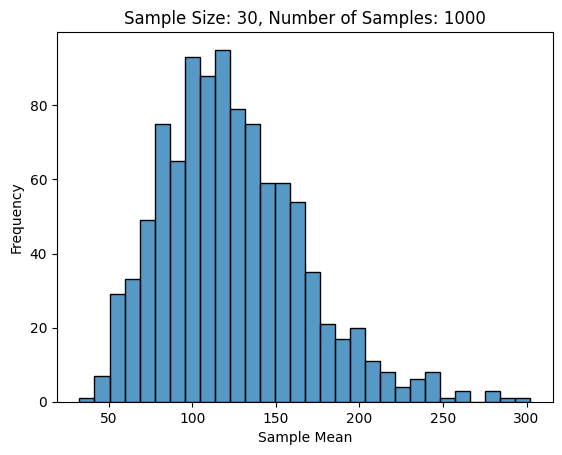

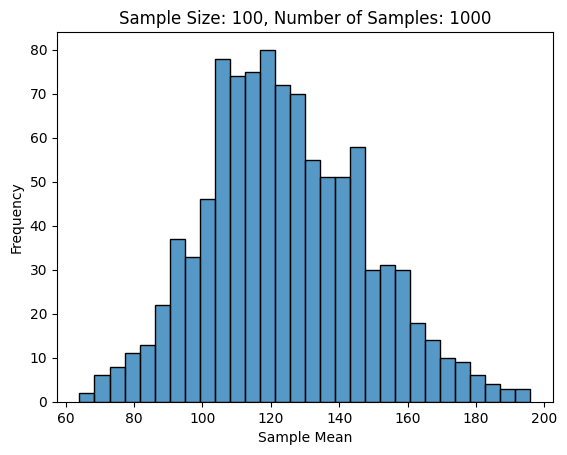

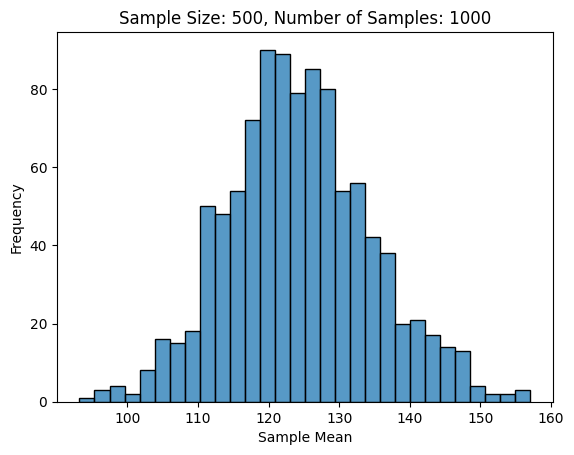

In [28]:
# function definition 
def visualize_clt(data, sample_size, num_samples):
    sample_means = [np.mean(np.random.choice(data, size=sample_size)) for _ in range(num_samples)]
    sns.histplot(sample_means, bins=30, edgecolor='black')
    plt.title(f'Sample Size: {sample_size}, Number of Samples: {num_samples}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()

# funtion call
visualize_clt(data['amt'], sample_size=30, num_samples=1000)
visualize_clt(data['amt'], sample_size=100, num_samples=1000)
visualize_clt(data['amt'], sample_size=500, num_samples=1000)

Difference between sample mean vs sampling distribution mean 

Sample Mean : The mean of a single sample

Sample Distribution Mean : The mean of all the possible sample means which approximates to the population mean 

In [29]:
sample_means_distribution = [np.mean(np.random.choice(data['amt'], size=100)) for _ in range(1000)]
sample_means_distribution

[np.float64(85.4033),
 np.float64(162.769),
 np.float64(96.4101),
 np.float64(110.58580000000003),
 np.float64(134.4509),
 np.float64(111.09099999999998),
 np.float64(149.48360000000002),
 np.float64(143.1208),
 np.float64(124.95229999999998),
 np.float64(147.7114),
 np.float64(107.7626),
 np.float64(106.19629999999998),
 np.float64(127.21730000000001),
 np.float64(100.21789999999999),
 np.float64(106.586),
 np.float64(143.67430000000002),
 np.float64(104.825),
 np.float64(139.2597),
 np.float64(100.6645),
 np.float64(134.416),
 np.float64(129.74),
 np.float64(122.94320000000002),
 np.float64(131.5532),
 np.float64(142.9477),
 np.float64(123.67370000000001),
 np.float64(98.162),
 np.float64(97.83530000000002),
 np.float64(101.7587),
 np.float64(133.634),
 np.float64(120.8867),
 np.float64(114.00120000000001),
 np.float64(127.3186),
 np.float64(160.3796),
 np.float64(136.9641),
 np.float64(95.6638),
 np.float64(135.8668),
 np.float64(110.9611),
 np.float64(96.9183),
 np.float64(68.17519

In [30]:
sampling_distribution_mean = np.mean(sample_means_distribution)
print(sampling_distribution_mean)


125.26430230000001


In [31]:
print(population_mean)

124.43007337671327


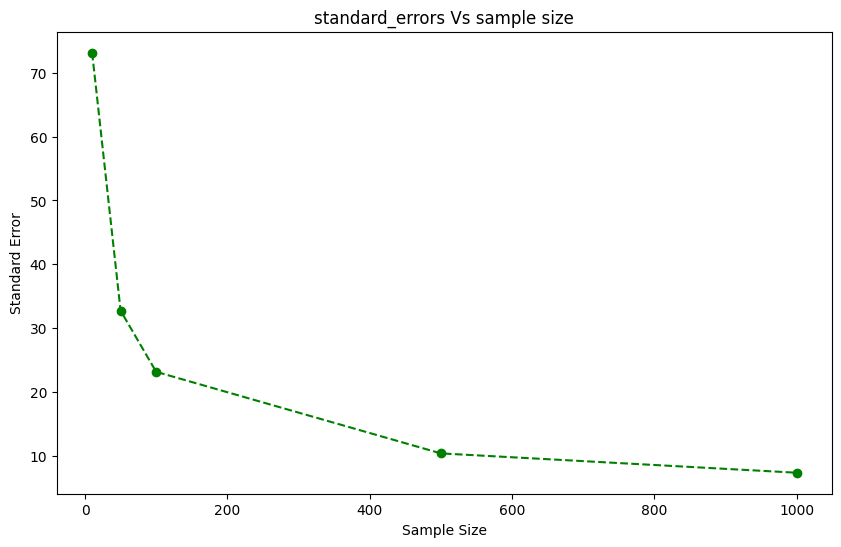

In [32]:
population_std = data['amt'].std()

sample_sizes = [10, 50, 100, 500, 1000]
standard_errors = [population_std/np.sqrt(sample_size) for sample_size in sample_sizes]

plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, standard_errors, marker='o', linestyle='--', color='g')
plt.title('standard_errors Vs sample size')
plt.xlabel('Sample Size')
plt.ylabel('Standard Error')
plt.show()